In [14]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

Question 1 — The DS Problem

In your own words, formulate the Data Science problem that you were given.

Question 2 — Prepare the Data (10 pts)

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
- Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
- At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.

In [3]:
flight_data = pd.read_csv('2019_ONTIME_REPORTING_FSW.csv')
print(flight_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB
None


In [4]:
print(flight_data.head())
print(flight_data.isnull().sum())
flight_data = flight_data.dropna()

      FL_DATE CARRIER_CODE TAIL_NUM  FL_NUM ORIGIN ORIGIN_ST DEST DEST_ST  \
0  2019-10-01           AA   N916NN    2311    TUS        AZ  ORD      IL   
1  2019-10-01           AA   N733UW    2315    PHX        AZ  DEN      CO   
2  2019-10-01           AA   N140AN    2318    DFW        TX  LAX      CA   
3  2019-10-01           AA   N925AN    2325    SNA        CA  DFW      TX   
4  2019-10-01           AA   N143AN    2328    ATL        GA  LAX      CA   

   DEP_TIME  DEP_DELAY  ARR_TIME  ARR_DELAY  ELAPSED_TIME  DISTANCE  
0     828.0        0.0    1353.0        0.0         205.0      1437  
1    1907.0        0.0    2159.0        0.0         112.0       602  
2    1904.0      104.0    2016.0      101.0         192.0      1235  
3    1729.0        4.0    2215.0        3.0         166.0      1205  
4     656.0        0.0     841.0        0.0         285.0      1947  
FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_

In [5]:
flight_data['FL_DATE'] = flight_data['FL_DATE'].astype('datetime64[s]')
flight_data['CARRIER_CODE'] = flight_data['CARRIER_CODE'].astype('category')
flight_data['TAIL_NUM'] = flight_data['TAIL_NUM'].astype('string')
flight_data['ORIGIN'] = flight_data['ORIGIN'].astype('string')
flight_data['ORIGIN_ST'] = flight_data['ORIGIN_ST'].astype('string')
flight_data['DEST'] = flight_data['DEST'].astype('string')
flight_data['DEST_ST'] = flight_data['DEST_ST'].astype('string')

dep_time_list = []
arr_time_list = []
for time in flight_data['DEP_TIME']:
  new_time = str(int(time))
  new_time = new_time.zfill(4)
  new_time = new_time[0] + new_time[1] + ':' + new_time[2] + new_time[3]
  if new_time == '24:00':
    new_time = '00:00'
  new_time = dt.datetime.strptime(new_time, '%H:%M').time()
  dep_time_list.append(new_time)

for time in flight_data['ARR_TIME']:
  new_time = str(int(time))
  new_time = new_time.zfill(4)
  new_time = new_time[0] + new_time[1] + ':' + new_time[2] + new_time[3]
  if new_time == '24:00':
    new_time = '00:00'
  new_time = dt.datetime.strptime(new_time, '%H:%M').time()
  arr_time_list.append(new_time)

flight_data['DEP_TIME'] = dep_time_list
flight_data['ARR_TIME'] = arr_time_list

#flight_data['DEP_TIME'] = flight_data['DEP_TIME'].astype('datetime64[s]')
#flight_data['ARR_TIME'] = flight_data['ARR_TIME'].astype('datetime64[s]')

In [6]:
print(flight_data.head(10))

     FL_DATE CARRIER_CODE TAIL_NUM  FL_NUM ORIGIN ORIGIN_ST DEST DEST_ST  \
0 2019-10-01           AA   N916NN    2311    TUS        AZ  ORD      IL   
1 2019-10-01           AA   N733UW    2315    PHX        AZ  DEN      CO   
2 2019-10-01           AA   N140AN    2318    DFW        TX  LAX      CA   
3 2019-10-01           AA   N925AN    2325    SNA        CA  DFW      TX   
4 2019-10-01           AA   N143AN    2328    ATL        GA  LAX      CA   
5 2019-10-01           AA   N816NN    2339    PHX        AZ  JFK      NY   
6 2019-10-01           AA   N150NN    2349    LAX        CA  BOS      MA   
7 2019-10-01           AA   N994AN    2354    LAX        CA  DFW      TX   
8 2019-10-01           AA   N404AN    2361    LAX        CA  MCO      FL   
9 2019-10-01           AA   N134AN    2364    ORD        IL  LAX      CA   

   DEP_TIME  DEP_DELAY  ARR_TIME  ARR_DELAY  ELAPSED_TIME  DISTANCE  
0  08:28:00        0.0  13:53:00        0.0         205.0      1437  
1  19:07:00        0.0 

Question 3 — (20 points)

- Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
- For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
- For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
 - *Hint: Don't forget that proportion is an explicit requirement.

In [ ]:
# Type code here

Question 4 — (20 points)

- Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
- Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
 - **Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_91163/2153054670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_delays = flight_data.groupby(['CARRIER_CODE', 'ORIGIN_ST'])['ARR_DELAY'].mean().reset_index()


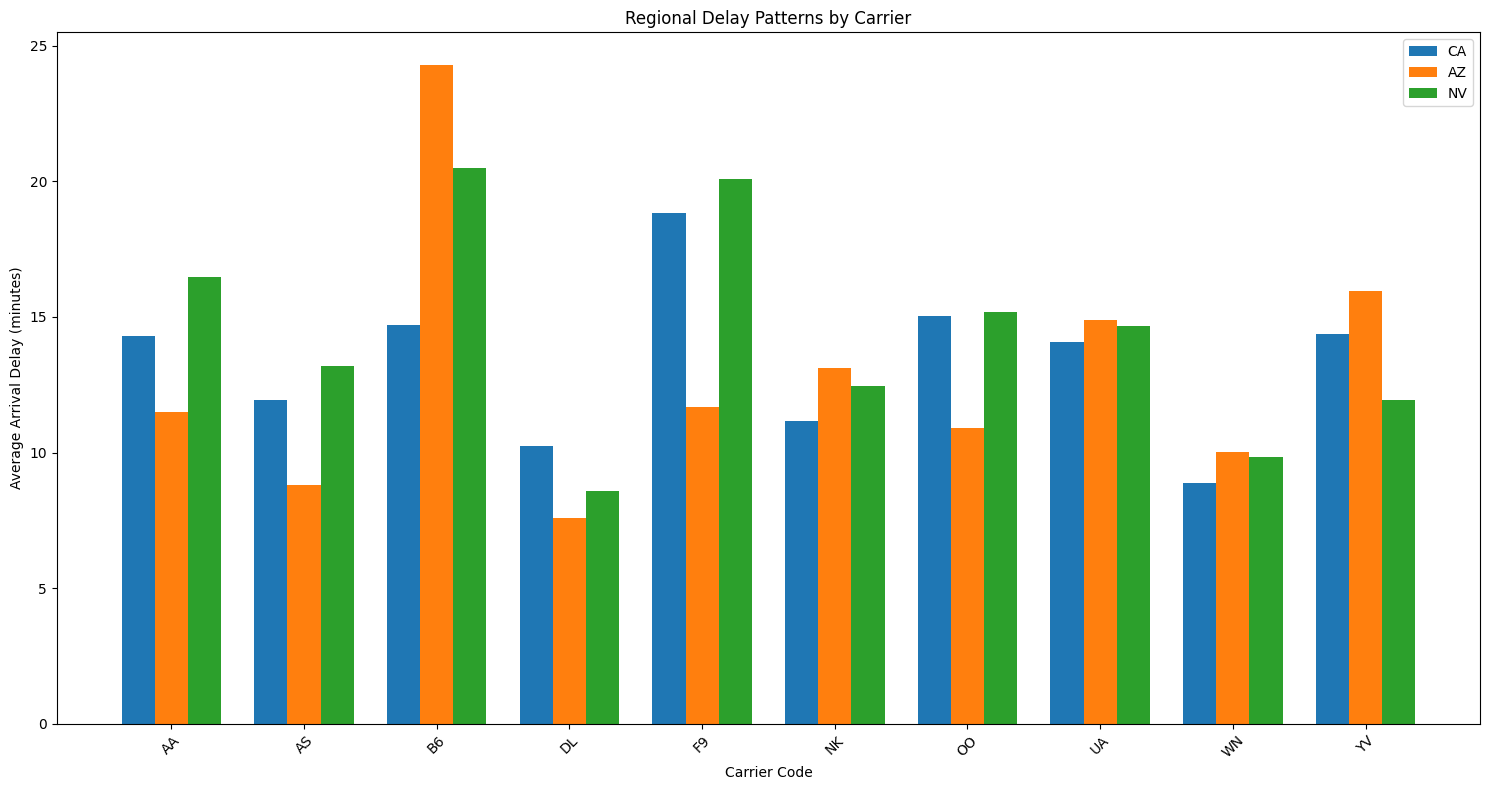


Regional Delay Patterns:
CARRIER_CODE ORIGIN_ST  ARR_DELAY
          AA        AZ      11.48
          AA        CA      14.31
          AA        NV      16.48
          AS        AZ       8.82
          AS        CA      11.93
          AS        NV      13.21
          B6        AZ      24.28
          B6        CA      14.70
          B6        NV      20.51
          DL        AZ       7.57
          DL        CA      10.24
          DL        NV       8.58
          F9        AZ      11.67
          F9        CA      18.85
          F9        NV      20.08
          NK        AZ      13.12
          NK        CA      11.17
          NK        NV      12.47
          OO        AZ      10.91
          OO        CA      15.03
          OO        NV      15.19
          UA        AZ      14.88
          UA        CA      14.07
          UA        NV      14.66
          WN        AZ      10.04
          WN        CA       8.90
          WN        NV       9.84
          YV        AZ

In [15]:
# Calculate average delays by carrier and region
regional_delays = flight_data.groupby(['CARRIER_CODE', 'ORIGIN_ST'])['ARR_DELAY'].mean().reset_index()

# Get the top 10 carriers by flight count from flight_data
top_10_carriers = flight_data['CARRIER_CODE'].value_counts().head(10).reset_index()
top_10_carriers.columns = ['CARRIER_CODE', 'Count']
top_10_carrier_codes = top_10_carriers['CARRIER_CODE'].tolist()

# Filter for only the top 10 carriers and specific regions of interest
regional_patterns = regional_delays[
    (regional_delays['CARRIER_CODE'].isin(top_10_carrier_codes)) & 
    (regional_delays['ORIGIN_ST'].isin(['CA', 'AZ', 'NV']))
]

# Create a bar plot for regional delays
plt.figure(figsize=(15, 8))
carriers = regional_patterns['CARRIER_CODE'].unique()
states = ['CA', 'AZ', 'NV']
x = np.arange(len(carriers))
width = 0.25

for i, state in enumerate(states):
    state_data = regional_patterns[regional_patterns['ORIGIN_ST'] == state]
    state_delays = [state_data[state_data['CARRIER_CODE'] == carrier]['ARR_DELAY'].values[0] 
                   if len(state_data[state_data['CARRIER_CODE'] == carrier]) > 0 else 0 
                   for carrier in carriers]
    plt.bar(x + i*width, state_delays, width, label=state)

plt.xlabel('Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Regional Delay Patterns by Carrier')
plt.xticks(x + width, carriers, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print summary of regional patterns
print("\nRegional Delay Patterns:")
print(regional_patterns.round(2).to_string(index=False))

Question 5 — (30 points)

- Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
 - Note: it's important to explain your rational for determining "the best performance".
- For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
 - Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.


In [ ]:
# Type code here

Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

- Indicate which airline operates the selected aircraft and where it often travels.
- Arrival and departure delays at the airports where it traveled.
- Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
 - ***Note: the TAIL_NUM can help you to identify each unique aircraft.

In [9]:
top_three_tail = flight_data['TAIL_NUM'].value_counts(ascending=False).head(3).reset_index()
top_three_tail = list(top_three_tail['TAIL_NUM'])

for tail in top_three_tail:
  tail_numbers_df = flight_data[flight_data['TAIL_NUM'] == tail].copy()

for tail in top_three_tail:
    tail_numbers_df = flight_data[flight_data['TAIL_NUM'] == tail]
    airline = tail_numbers_df['CARRIER_CODE'].iloc[0]
    print(f"Aircraft {tail} is operated by carrier: {airline}")

Aircraft N706SK is operated by carrier: OO
Aircraft N726SK is operated by carrier: OO
Aircraft N742SK is operated by carrier: OO


Question 7 — Summary

Summarize the overall analysis and share THREE (3) key findings.